In [60]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
titanic_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [62]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
titanic_df.info()
#now analysis all the features one by one 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


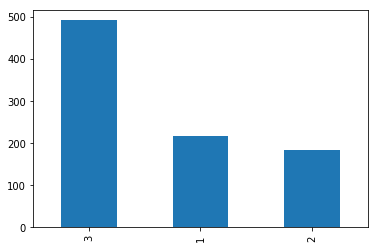

In [64]:
titanic_df['Pclass'].value_counts().plot(kind = 'bar')

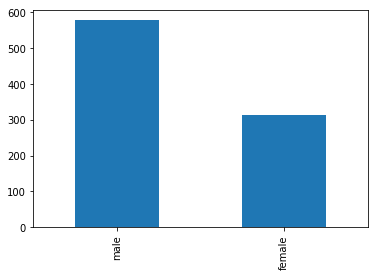

In [65]:
#So the passengers of lower classes died more.
titanic_df['Sex'].value_counts().plot(kind='bar')

In [66]:
#plt.hist(titanic_df['Age'], bins=[10,20,30,40,50,60,70,80,90,100],range = None)

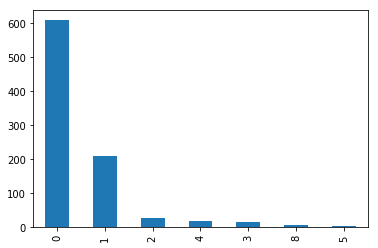

In [67]:
titanic_df['SibSp'].value_counts().plot(kind='bar')

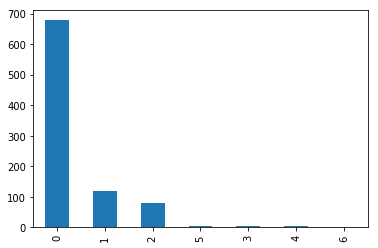

In [68]:
titanic_df['Parch'].value_counts().plot(kind='bar')

(array([  16.,  313.,  109.,   69.,   40.,   94.,   45.,   15.,   19.,
           7.,   18.,   21.,    6.,    5.,   12.,    7.,   21.,    8.,
           9.,    4.,    0.,    0.,    4.,    7.,    0.,    4.,    0.,
           2.,    5.,    0.,    2.,    4.,    3.,    0.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    4.,
           0.,    1.,    4.,    0.,    0.,    0.,    2.,    0.,    0.,
           6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    3.]),
 array([   0.        ,    4.78812336,    9.57624673,   14.36437009,
          19.15249346,   23.94061682,   28.72874019,   33.51686355,
          38.3049

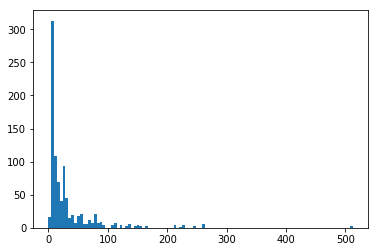

In [69]:
plt.hist(titanic_df['Fare'],bins='auto')

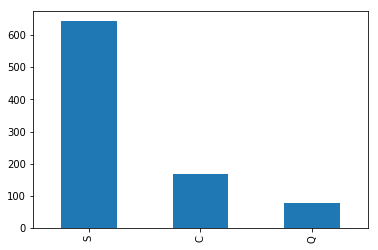

In [70]:
titanic_df['Embarked'].value_counts().plot(kind='bar')

In [71]:
titanic_df=titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df=test_df.drop(['Name','Ticket'], axis=1)

In [72]:
# in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
#in titanic_df and test_df, fill missing ages with mean of age
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df['Age'].mean())
test_df["Age"] = test_df["Age"].fillna(titanic_df['Age'].mean())
#in test_df, fill on value of fare with mean value
test_df["Fare"] = test_df["Fare"].fillna(test_df['Fare'].mean())

In [73]:
titanic_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [74]:
titanic_df.Age.mean()

29.699117647058763

In [75]:
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

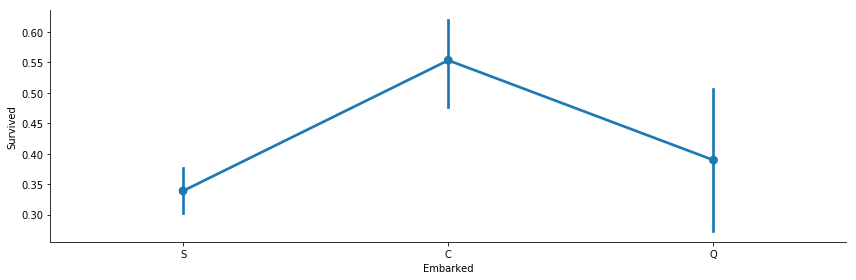

In [76]:
##bivariate analysis
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

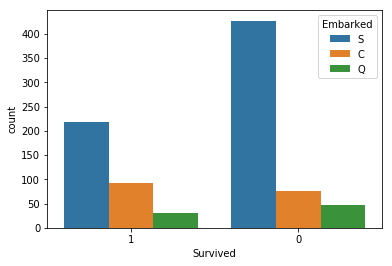

In [77]:
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0])

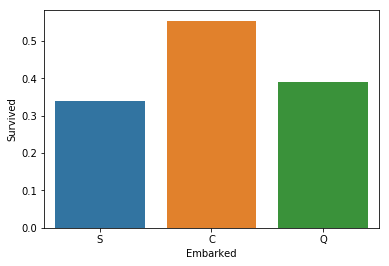

In [78]:
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'])

In [79]:
embark_perc

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [80]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [81]:
test_df.head()
#embarked is converted into form that classifier will be able to interprete and use it properly to get accurate results.


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,892,3,male,34.5,0,0,7.8292,0,1
1,893,3,female,47.0,1,0,7.0000,0,0
2,894,2,male,62.0,0,0,9.6875,0,1
3,895,3,male,27.0,0,0,8.6625,0,0
4,896,3,female,22.0,1,1,12.2875,0,0


In [82]:
titanic_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22.0,1,0,7.2500,0,0
1,1,1,female,38.0,1,0,71.2833,1,0


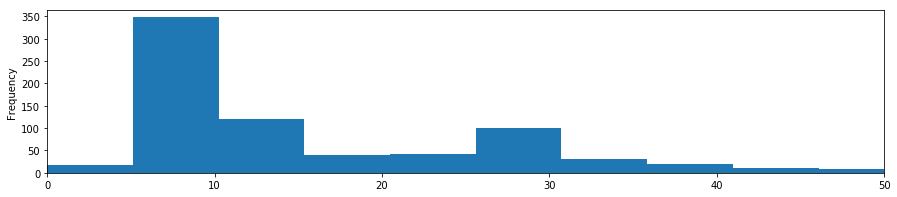

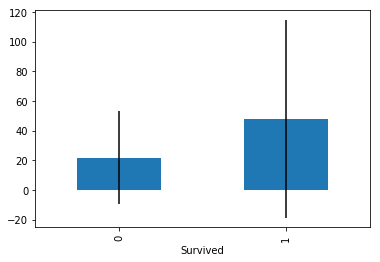

In [83]:
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)
 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

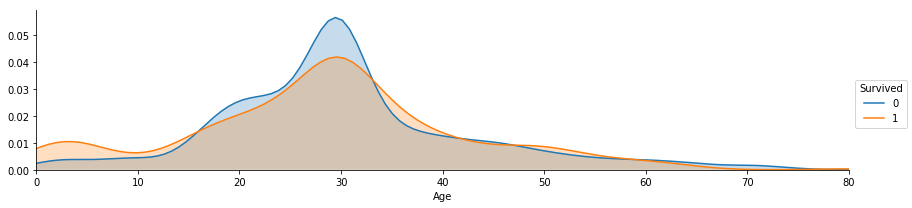

In [84]:
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

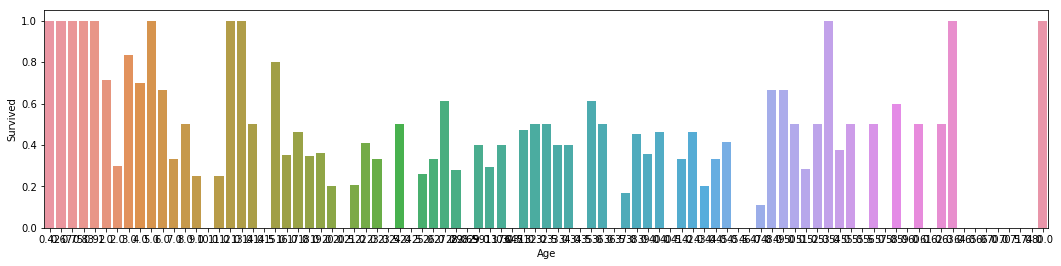

In [85]:
##avg survived in terms of age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [86]:
##create family variable instead of parch &sibsp both

titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

C:\Users\Ghanshyam\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

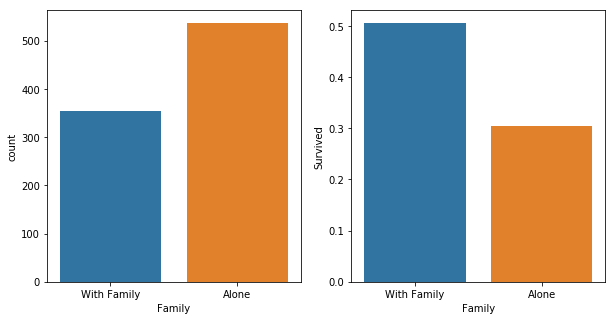

In [87]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0])

axis1.set_xticklabels(["With Family","Alone"])

In [88]:
# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.So, we can classify passengers as males, females, and child
def person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(person,axis=1)
test_df['Person'] = test_df[['Age','Sex']].apply(person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

In [89]:
test_df.head(10)

,PassengerId,Pclass,Age,Fare,C,Q,Family,Person
0,892,3,34.5,7,0,1,0,male
1,893,3,47.0,7,0,0,1,female
2,894,2,62.0,9,0,1,0,male
3,895,3,27.0,8,0,0,0,male
4,896,3,22.0,12,0,0,1,female
5,897,3,14.0,9,0,0,0,child
6,898,3,30.0,7,0,1,0,female
7,899,2,26.0,29,0,0,1,male
8,900,3,18.0,7,1,0,0,female
9,901,3,21.0,24,0,0,1,male


In [90]:
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']

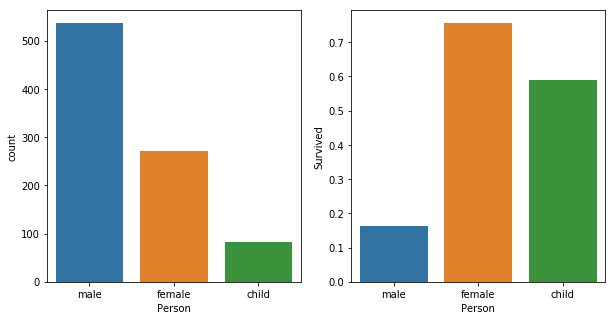

In [91]:
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)
person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)
titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x='Person', data=titanic_df, ax=axis1)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

In [92]:
titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

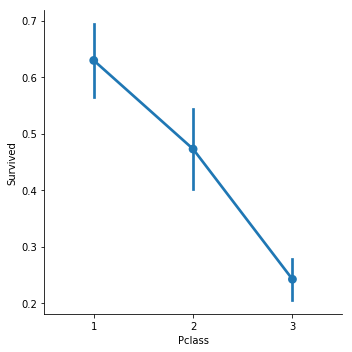

In [93]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.80695847362514028

In [96]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

coeff_df

,Features,Coefficient Estimate
0,Age,-0.026924
1,Fare,0.000841
2,C,0.598745
3,Q,0.287247
4,Family,-0.269346
5,Child,1.807285
6,Female,2.772187
7,Class_1,2.055883
8,Class_2,1.133181


In [97]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)


0.96520763187429859

In [98]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)